**Linear regression**

https://github.com/fastai/course-v3/blob/master/nbs/dl1/lesson2-sgd.ipynb

In [7]:
from fastai.vision.all import *

from fastbook import *

In [333]:
n = 30

In [350]:
x = torch.arange(0, n).float()
x

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29.])

In [351]:
y = 3.0 * x + 2.0 + 0.9 * torch.randn(n)

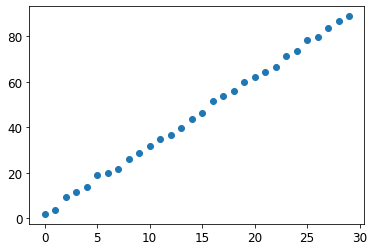

In [352]:
plt.scatter(x, y);

In [353]:
def f(x, params):
    a, b = params
    return a * x + b

In [339]:
# def mse(y_hat, y): return ((y_hat-y)**2).mean()


def mse(preds, targets):
    return ((preds - targets) ** 2).mean()

Step 1: Initialize the parameters

In [340]:
params = torch.randn(2).requires_grad_()

In [341]:
# a = tensor(-1.,1)

In [342]:
# y_hat = x@a
# mse(y_hat, y)

# y_hat thành preds, y thành target
preds = f(x, params)
preds

tensor([ 0.2959,  0.2789,  0.2620,  0.2451,  0.2282,  0.2113,  0.1944,  0.1774,  0.1605,  0.1436,  0.1267,  0.1098,  0.0929,  0.0759,  0.0590,  0.0421,  0.0252,  0.0083, -0.0086, -0.0256, -0.0425,
        -0.0594, -0.0763, -0.0932, -0.1101, -0.1271, -0.1440, -0.1609, -0.1778, -0.1947], grad_fn=<AddBackward0>)

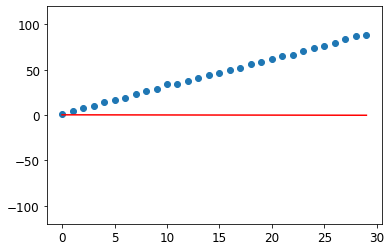

In [343]:
# plt.scatter(x[:,0],y)
# plt.scatter(x[:,0],y_hat);


def show_preds(preds, ax=None):
    if ax is None:
        ax = plt.subplots()[1]
    ax.scatter(x, y)
    ax.plot(x, preds.detach(), color="red")
    ax.set_ylim(-120, 120)


show_preds(preds)

In [346]:
def apply_step(params, prn=True):
    lr = 1e-3
    preds = f(x, params)
    loss = mse(preds, y)
    if prn:
        print(loss.item())
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None

    return preds

2825.767822265625
518.7445068359375
95.75801849365234
18.204484939575195
3.985102891921997
1.3778799772262573
0.8997126221656799
0.8119011521339417
0.7956599593162537
0.7925403118133545


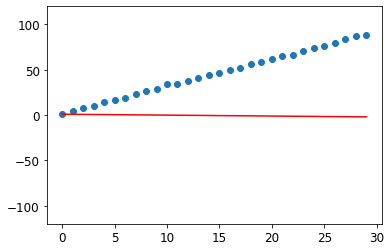

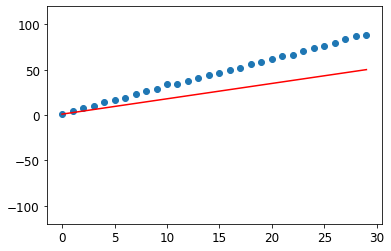

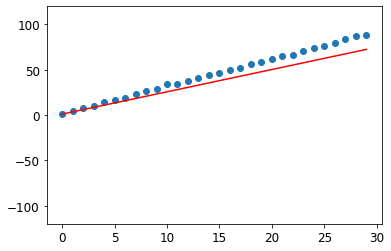

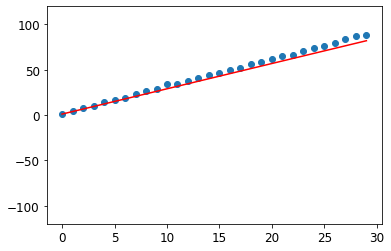

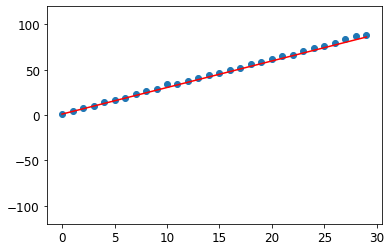

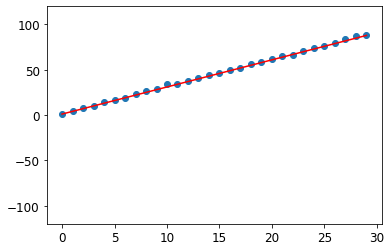

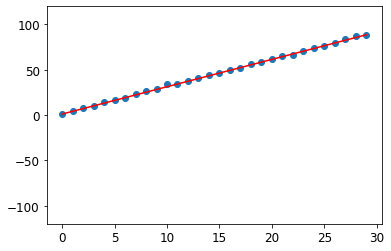

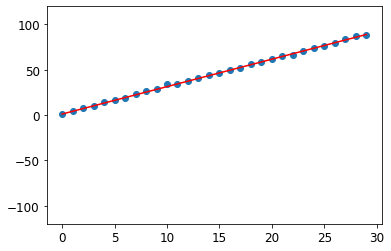

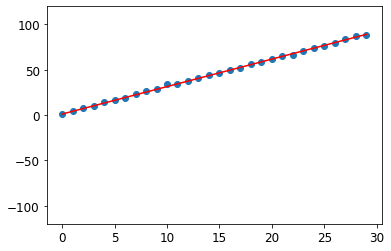

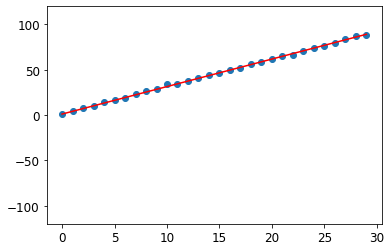

In [348]:
# lr = 1e-1
# for t in range(100): update()

params = torch.randn(2).requires_grad_()

# lr = 5e-1
for i in range(10):
    preds = apply_step(params)
    show_preds(preds)

**Chapter 4: Gradient decent example**

An End-to-End GD Example

In [286]:
time = torch.arange(0, 20).float()
time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

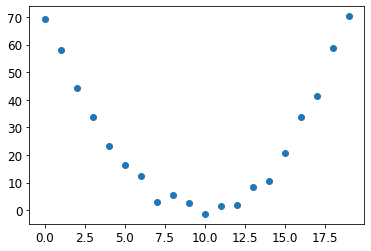

In [287]:
speed = torch.randn(20) * 3 + 0.75 * (time - 9.5) ** 2 + 1
plt.scatter(time, speed);

In [288]:
def f(t, params):
    a, b, c = params
    return a * (t ** 2) + (b * t) + c

In [289]:
def mse(preds, targets):
    return ((preds - targets) ** 2).mean().sqrt()

**init params**

In [290]:
params = torch.rand(3).requires_grad_()

In [291]:
orig_params = params.clone()

In [292]:
preds = f(time, params)
preds

tensor([  0.8845,   2.1963,   4.4007,   7.4977,  11.4872,  16.3693,  22.1440,  28.8112,  36.3710,  44.8233,  54.1682,  64.4056,  75.5357,  87.5582, 100.4734, 114.2811, 128.9814, 144.5742, 161.0596,
        178.4375], grad_fn=<AddBackward0>)

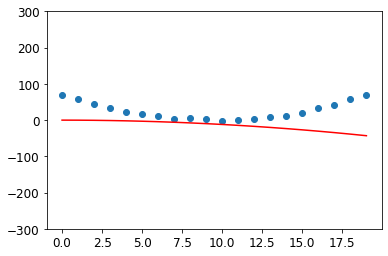

In [327]:
def show_preds(preds, ax=None):
    if ax is None:
        ax = plt.subplots()[1]
    ax.scatter(time, speed)
    ax.plot(time, preds.detach(), color="red")
    ax.set_ylim(-300, 300)


show_preds(preds)

In [328]:
def apply_step(params, prn=True):
    lr = 1e-3
    preds = f(time, params)
    loss = mse(preds, speed)
    if prn:
        print(loss.item())
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None

    return preds

154.9361572265625
127.55342864990234
100.61409759521484
74.54959106445312
50.51944351196289
32.12107467651367
25.8915958404541
25.789220809936523
25.7882137298584
25.788047790527344


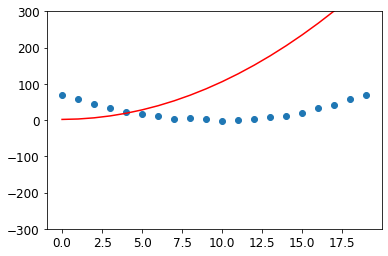

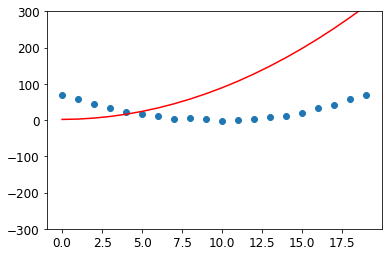

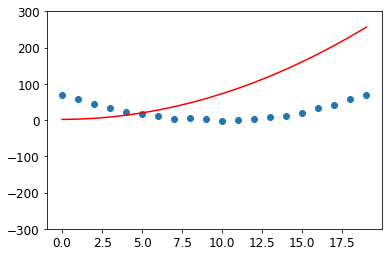

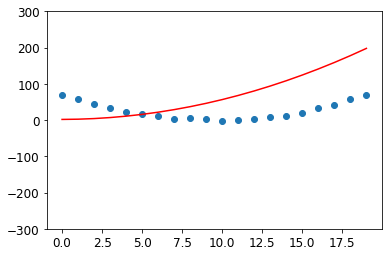

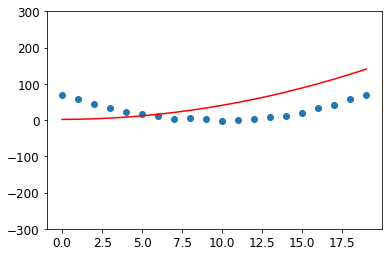

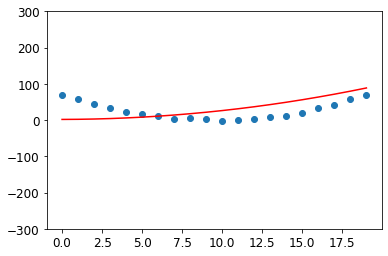

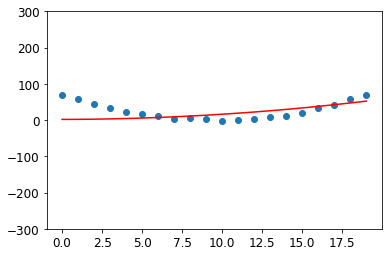

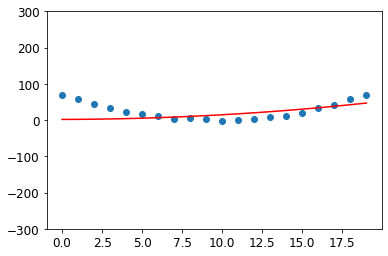

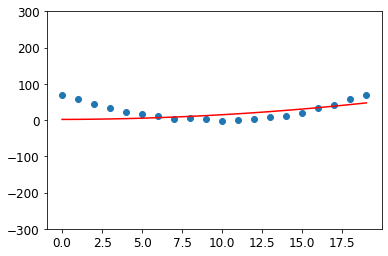

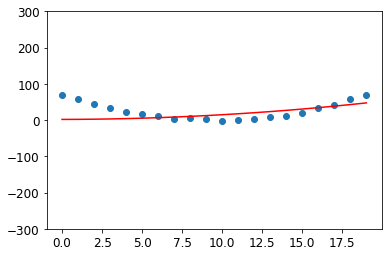

In [330]:
params = torch.randn(3).requires_grad_()


for i in range(10):
    preds = apply_step(params)
    show_preds(preds)